In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial')
sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial")
!pwd

/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial


In [4]:
df = pd.read_csv('./datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


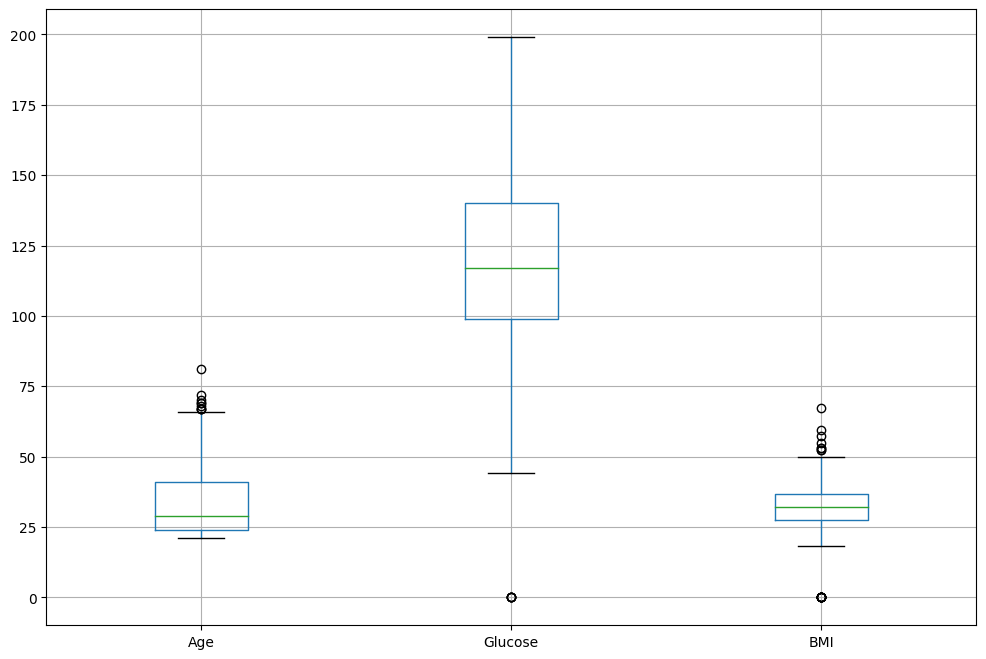

In [6]:
df.boxplot(column=['Age','Glucose','BMI'], figsize=(12,8))
plt.show();

In [7]:
Outcome = df['Outcome']
df = df.drop(['Outcome'], axis=1)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
robust_scaled_df = pd.DataFrame(robust_scale(df),
                                columns=df.columns)

In [10]:
# all median values (50%) are zero(0) now
robust_scaled_df[['Age','Glucose','BMI']].describe()

,Age,Glucose,BMI
count,768.000000,768.000000,768.000000
mean,0.249464,0.094413,-0.000798
std,0.691778,0.775094,0.847759
min,-0.470588,-2.836364,-3.440860
25%,-0.294118,-0.436364,-0.505376
50%,0.000000,0.000000,0.000000
75%,0.705882,0.563636,0.494624
max,3.058824,1.987879,3.774194


In [11]:
robust_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


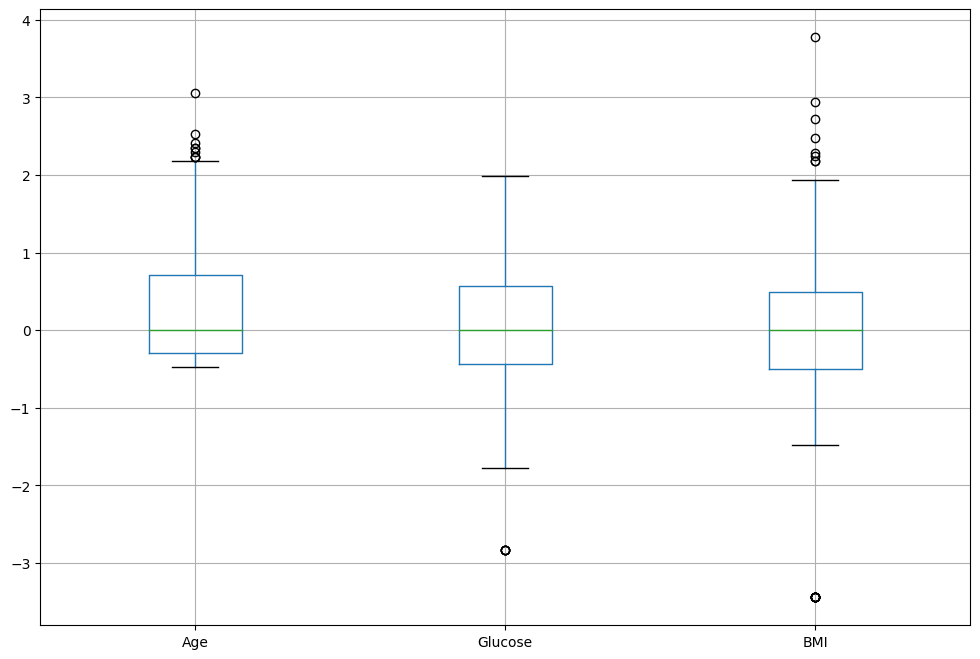

In [12]:
robust_scaled_df.boxplot(column=['Age','Glucose','BMI'], figsize=(12,8))
plt.show();
#as can be seen we still have outliers in the data

In [13]:
robust_scaler = RobustScaler(copy=True,
                             with_centering=True,
                             with_scaling=True)

robust_scaler

RobustScaler()

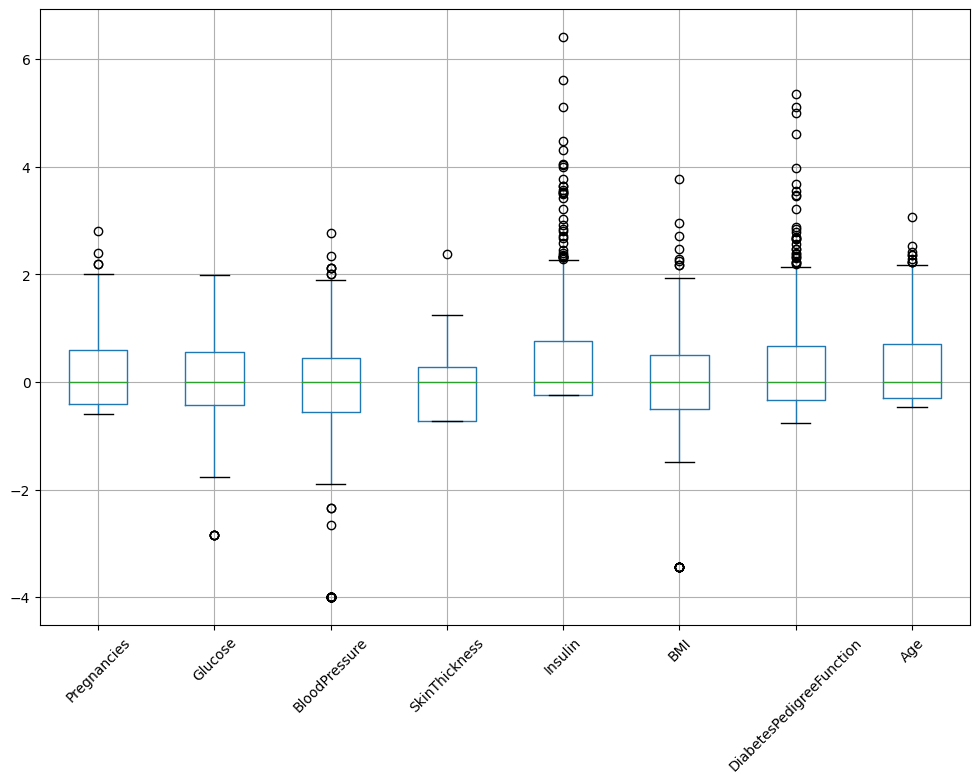

In [14]:
robust_scale_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scale_array, columns=df.columns)

robust_scaled_df.boxplot(figsize=(12,8), rot=45)

plt.show();

In [15]:
robust_scaled_df['Outcome'] = Outcome

In [16]:
robust_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


In [17]:
robust_scaled_df.to_csv('robust_scaled.csv', index=False)